In [1]:
import sampling as smp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training = pd.read_msgpack('training.bin')
training.columns

Index(['subject', 'img', 'pixels', 'maskArea', 'maskC', 'maskS', 'maskV',
       'maskContour', 'hasmask', 'XYextents', 'maskW', 'maskH'],
      dtype='object')

Load all contours

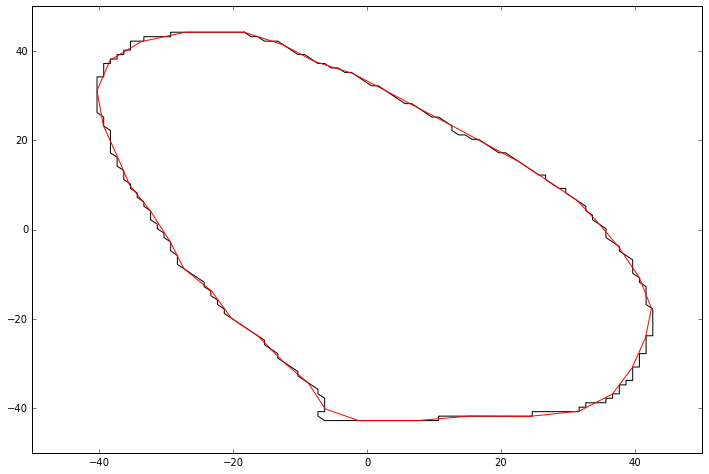

In [3]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

contours = training[training['hasmask']]['maskContour']
idx = 0

def downsample_contour(contour, num=50):
    C = contour - np.mean(contour,axis=0)
    T = np.linspace(0,1,C.shape[0])
    
    ius0 = InterpolatedUnivariateSpline(T, C[:,0])
    ius1 = InterpolatedUnivariateSpline(T, C[:,1])
    
    To = np.linspace(0,1,num)
    return np.vstack((ius0(To), ius1(To))).T

C = contours[idx] - np.mean(contours[idx],axis=0)
iC = downsample_contour(contours[idx], num=40)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(C[:,1], C[:,0], 'k')
ax.plot(iC[:,1], iC[:,0], 'r')

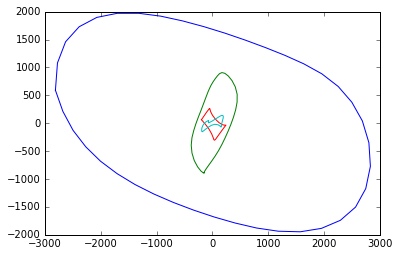

In [4]:
num=40
dsContours = np.empty((len(contours),num*2))
for idx, contour in enumerate(contours):
    dsContours[idx,:] = downsample_contour(contour, num=num).flatten()
    

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = dsContours.T
#X = StandardScaler().fit_transform(dsContours.T)
#X = maskdata/np.max(abs(maskdata),axis=0)
pca = PCA(n_components=0.995)
pca.fit(X)
pca.explained_variance_ratio_

P = pca.fit_transform(X)
#separate x,y -- not entirel
Px = P[0::2,:]
Py = P[1::2,:]
N = len(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
#for i in range(N):
ax.plot(Px,Py,'-')

